In [9]:
import wave
from os import path
# loading the data for processing, passing rb instance as read binary mode
obj = wave.open("tz_swh_train/SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part2.wav", "rb")

print("Number of channels", obj.getnchannels()) 
print("sample width", obj.getsampwidth())
print("frame rate", obj.getframerate())
print("Number of frames", obj.getnframes())
print("parameters", obj.getparams())

Number of channels 1
sample width 2
frame rate 16000
Number of frames 71520
parameters _wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=71520, comptype='NONE', compname='not compressed')


In [10]:
t_audio =  obj.getnframes() / obj.getframerate()
print(t_audio)

frames = obj.readframes(-1)
print(type(frames), type(frames[0]))
print(len(frames)/2)

4.47
<class 'bytes'> <class 'int'>
71520.0


In [11]:
# Now for saving the instance of file after processing,
# use the wb instance in the function for write binary mode. 

# obj_new = wave.open("../Data/Swahili-Data-sets-ava/Kenyan_Swahili_Data/wavs/KISWA-00001.wav", "wb")

import speech_recognition as sr
from pydub import AudioSegment

sound = AudioSegment.from_wav("tz_swh_train/SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part2.wav")

AUDIO_FILE = "tz_swh_train/SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part2.wav"

r = sr.Recognizer()
with sr.AudioFile(AUDIO_FILE) as source:
   audio = r.record(source)

   print("Transcription: " + r.recognize_google(audio, language="sw-TZ"))


Transcription: ni zambi na nusu kwa saa za afrika mashariki karibu na matumizi ya subuhi


4.47


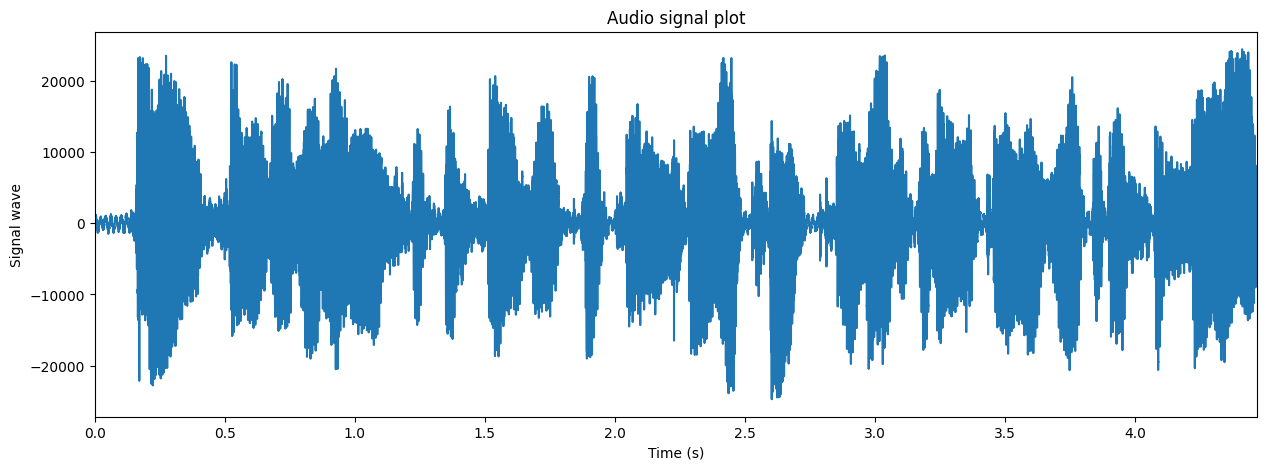

In [12]:
import matplotlib.pyplot as plt
import numpy as np

obj_1 = wave.open("tz_swh_train/SWH-05-20101106_16k-emission_swahili_05h30_-_06h00_tu_20101106_part2.wav", "rb")

sample_freq = obj_1.getframerate()
n_samples = obj_1.getnframes()
signal_wave = obj_1.readframes(-1)

obj_1.close()

t_audio = n_samples / sample_freq

print(t_audio)

signal_array = np.frombuffer(signal_wave, dtype=np.int16)
times = np.linspace(0, t_audio, num=n_samples)
plt.figure(figsize=(15,5))
plt.plot(times, signal_array)
plt.title("Audio signal plot")
plt.ylabel("Signal wave")
plt.xlabel("Time (s)")
plt.xlim(0, t_audio)
plt.show()



In [13]:
import pyaudio
import wave

FRAMES_PER_BUFFER = 3200
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 16000

p = pyaudio.PyAudio()

stream = p.open(
   format=FORMAT,
   channels=CHANNELS,
   rate=RATE,
   input=True,
   frames_per_buffer=FRAMES_PER_BUFFER
)

print("Start recording")

seconds = 6
frames = []
for i in range(0, int(RATE/FRAMES_PER_BUFFER*seconds)):
   data = stream.read(FRAMES_PER_BUFFER)
   frames.append(data)

stream.stop_stream()
stream.close()
p.terminate()

obj3 = wave.open("Output.wav", "wb")
obj3.setnchannels(CHANNELS)
obj3.setsampwidth(p.get_sample_size(FORMAT))
obj3.setframerate(RATE)
obj3.writeframes(b"".join(frames))
obj3.close


Start recording


<bound method Wave_write.close of <wave.Wave_write object at 0x00000157341BE4C0>>